## Import Libraries

In [1]:
import numpy as np
import pandas as pd

from tensorflow import keras
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

## Data

In [2]:
train_2020_2021 = pd.read_csv("/content/drive/MyDrive/FC_Project/data/Train_JF.csv")
train_2022 = pd.read_csv("/content/drive/MyDrive/FC_Project/data/Test_JF.csv")

In [3]:
train_2022 = train_2022.sort_index(axis=0,ascending=False)
train_2022

,Unnamed: 0,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
76,76,600143.SH,20220104,12.51,12.75,12.48,12.74,12.58,0.16,1.2719,203235.91,257068.017
75,75,600143.SH,20220105,12.72,12.91,12.61,12.67,12.74,-0.07,-0.5495,231187.15,294695.794
74,74,600143.SH,20220106,12.70,12.94,12.70,12.82,12.67,0.15,1.1839,221747.63,284397.707
73,73,600143.SH,20220107,12.92,13.28,12.83,13.05,12.82,0.23,1.7941,431736.05,565937.748
72,72,600143.SH,20220110,13.11,13.15,12.89,13.02,13.05,-0.03,-0.2299,225744.97,293749.968
...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,600143.SH,20220425,8.47,8.47,7.78,7.79,8.57,-0.78,-9.1015,290016.33,234874.403
3,3,600143.SH,20220426,7.89,8.24,7.86,7.91,7.79,0.12,1.5404,370102.93,297927.075
2,2,600143.SH,20220427,7.80,8.10,7.65,8.07,7.91,0.16,2.0228,280421.79,221401.511
1,1,600143.SH,20220428,8.04,8.18,7.82,7.91,8.07,-0.16,-1.9827,175931.37,140145.987


In [4]:
train_2020_2021 = train_2020_2021.sort_index(axis=0,ascending=False)
train_2020_2021

,Unnamed: 0,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
485,485,600143.SH,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230
484,484,600143.SH,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193
483,483,600143.SH,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780
482,482,600143.SH,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162
481,481,600143.SH,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697
...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,600143.SH,20211227,12.31,12.46,12.24,12.44,12.30,0.14,1.1382,147513.84,182760.320
3,3,600143.SH,20211228,12.48,13.30,12.44,12.84,12.44,0.40,3.2154,535992.92,694366.482
2,2,600143.SH,20211229,12.71,12.96,12.66,12.78,12.84,-0.06,-0.4673,225369.38,288456.413
1,1,600143.SH,20211230,12.70,12.77,12.60,12.61,12.78,-0.17,-1.3302,226973.80,287781.101


In [5]:
train = pd.concat([train_2020_2021, train_2022], axis=0)
train

,Unnamed: 0,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
485,485,600143.SH,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230
484,484,600143.SH,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193
483,483,600143.SH,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780
482,482,600143.SH,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162
481,481,600143.SH,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697
...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,600143.SH,20220425,8.47,8.47,7.78,7.79,8.57,-0.78,-9.1015,290016.33,234874.403
3,3,600143.SH,20220426,7.89,8.24,7.86,7.91,7.79,0.12,1.5404,370102.93,297927.075
2,2,600143.SH,20220427,7.80,8.10,7.65,8.07,7.91,0.16,2.0228,280421.79,221401.511
1,1,600143.SH,20220428,8.04,8.18,7.82,7.91,8.07,-0.16,-1.9827,175931.37,140145.987


### Constant

In [6]:
learning_rate = 6e-3

## Data Preprocessing

### Handle Nulls

In [7]:
train = train.drop("Unnamed: 0", axis=1)
train = train.drop("ts_code", axis=1)
train = train.dropna()
train.reset_index(inplace=True)
train = train.drop("index", axis=1)

### Add Target

In [8]:
target = train['close'][1:]
train = train[:-1]
train['target'] = list(target)
train_save = train
train

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230,7.53
1,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193,7.55
2,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780,7.67
3,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162,8.04
4,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697,8.06
...,...,...,...,...,...,...,...,...,...,...,...
557,20220422,8.64,8.73,8.40,8.57,8.64,-0.07,-0.8102,179261.76,152963.058,7.79
558,20220425,8.47,8.47,7.78,7.79,8.57,-0.78,-9.1015,290016.33,234874.403,7.91
559,20220426,7.89,8.24,7.86,7.91,7.79,0.12,1.5404,370102.93,297927.075,8.07
560,20220427,7.80,8.10,7.65,8.07,7.91,0.16,2.0228,280421.79,221401.511,7.91


In [9]:
test = train[-100:]
train = train[:-100]

### Cross Validation Split

In [10]:
def setup_cv(df, splits=5):
    df['fold'] = -1
    # df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    num_bins = int(np.floor(1 + np.log2(len(df))))
    df.loc[:, "bins"] = pd.cut(
        df["target"], bins=num_bins, labels=False
    )

    kf = StratifiedKFold(n_splits=splits)
    for f, (t_, v_) in enumerate(kf.split(X=df, y=df.bins.values)):
            df.loc[v_, 'fold'] = f

    df = df.drop("bins", axis=1)
    return df

In [11]:
train = setup_cv(train)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target,fold
0,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230,7.53,0
1,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193,7.55,0
2,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780,7.67,0
3,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162,8.04,0
4,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697,8.06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
457,20211123,13.19,13.23,12.93,13.04,13.22,-0.18,-1.3616,362576.21,474241.331,12.97,4
458,20211124,12.98,13.09,12.92,12.97,13.04,-0.07,-0.5368,238659.81,309873.783,12.90,4
459,20211125,12.97,12.98,12.80,12.90,12.97,-0.07,-0.5397,260155.42,335108.958,12.86,4
460,20211126,12.86,12.96,12.73,12.86,12.90,-0.04,-0.3101,241656.83,310091.396,12.72,4


## 1dCNN Model Design

In [12]:
def create_1dcnn(num_columns, num_labels, learning_rate):
    # input
    inp = tf.keras.layers.Input(shape=(num_columns,))
    x = tf.keras.layers.BatchNormalization()(inp)
    # 1dcnn
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Reshape((16, 16))(x)
    x = tf.keras.layers.Conv1D(filters=12,
                      kernel_size=2,
                      strides=1,
                      activation='swish')(x)
    x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
    x = tf.keras.layers.Flatten()(x)
    
    # ffn
    for i in range(3):
        x = tf.keras.layers.Dense(64 // (2 ** i), activation='swish')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.GaussianNoise(0.01)(x)
        x = tf.keras.layers.Dropout(0.20)(x)
    x = tf.keras.layers.Dense(num_labels, activation='relu')(x)
    
    model = tf.keras.models.Model(inputs=inp, outputs=x)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
    )
    return model

In [13]:
X_train = train.loc[:, train.columns != 'target']

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 batch_normalization (BatchN  (None, 11)               44        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               3072      
                                                                 
 reshape (Reshape)           (None, 16, 16)            0         
                                                                 
 conv1d (Conv1D)             (None, 15, 12)            396       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 12)            0         
 )                                                           

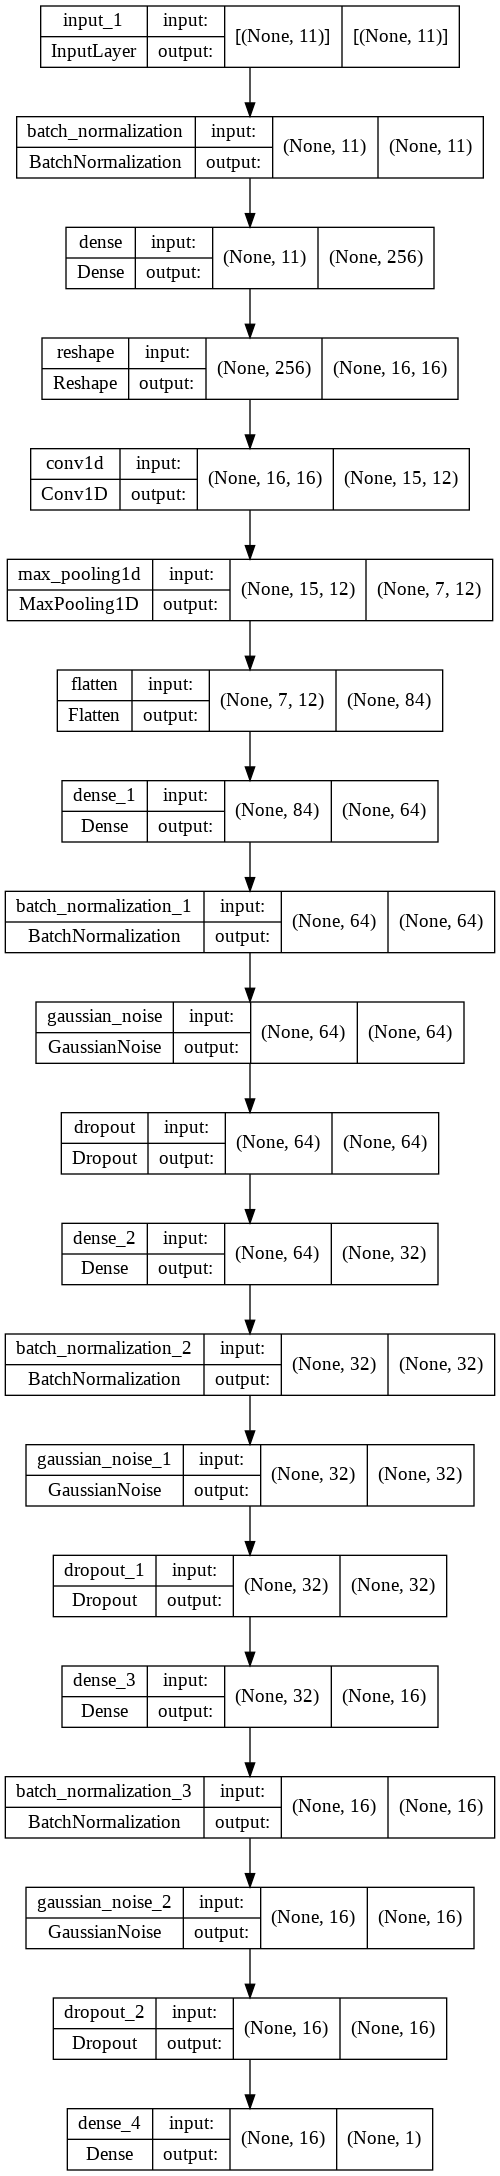

In [14]:
X_train = train.loc[:, train.columns != 'target']
y_train = train[["target"]]
model = create_1dcnn(X_train.shape[1], 1, learning_rate)
model.summary()
keras.utils.plot_model(model, show_shapes=True)

## Train Model

In [15]:
def train_1dcnn(train, folds):
    models = list()
    
    for f in range(folds):
        X_train = train[train.fold != f].loc[:, train.columns != 'target']
        X_train = X_train.loc[:, X_train.columns != 'fold']
        y_train = train[train.fold != f][["target"]]
        print(y_train)
        
        X_valid = train[train.fold == f].loc[:, train.columns != 'target']
        X_valid = X_valid.loc[:, X_valid.columns != 'fold']
        y_valid = train[train.fold == f][["target"]]

        # rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_delta=1e-5, verbose=2)
        # es = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=31, restore_best_weights=True, verbose=2)
        
        print(X_train.shape[1])
        model = create_1dcnn(X_train.shape[1], 1, learning_rate)
        # model.fit(X_train, y_train,
        #     epochs=100,
        #     validation_data=(X_valid, y_valid),
        #     validation_batch_size=len(y_valid),
        #     batch_size=128,
        #     verbose=1,
        #     callbacks=[rlr, es]
        # ) 
        model.fit(X_train, y_train,
            epochs=2000,
            validation_data=(X_valid, y_valid),
            validation_batch_size=len(y_valid),
            batch_size=128,
            verbose=1
        ) 

        oof_preds = model.predict(X_valid)
        oof_score = np.sqrt(mean_squared_error(y_valid, oof_preds))
        print(oof_score)
        models.append(model)
    
    return models

In [16]:
onedcnn_models = train_1dcnn(train, 5)

Streaming output truncated to the last 5000 lines.
Epoch 1510/2000
3/3 [==============================] - 0s 23ms/step - loss: 3.3648 - val_loss: 0.4244
Epoch 1511/2000
3/3 [==============================] - 0s 18ms/step - loss: 2.5010 - val_loss: 0.4504
Epoch 1512/2000
3/3 [==============================] - 0s 18ms/step - loss: 2.6284 - val_loss: 0.3858
Epoch 1513/2000
3/3 [==============================] - 0s 18ms/step - loss: 2.5092 - val_loss: 0.3892
Epoch 1514/2000
3/3 [==============================] - 0s 18ms/step - loss: 2.8860 - val_loss: 0.4755
Epoch 1515/2000
3/3 [==============================] - 0s 18ms/step - loss: 3.0386 - val_loss: 0.4644
Epoch 1516/2000
3/3 [==============================] - 0s 18ms/step - loss: 3.0211 - val_loss: 0.5416
Epoch 1517/2000
3/3 [==============================] - 0s 22ms/step - loss: 2.6077 - val_loss: 0.5349
Epoch 1518/2000
3/3 [==============================] - 0s 23ms/step - loss: 2.8163 - val_loss: 0.5097
Epoch 1519/2000
3/3 [==========

## Make Prediction

In [17]:
X_test = test.loc[:, test.columns != 'target']
y_test = test[["target"]]

In [18]:
onedcnn_preds = list()

for model in onedcnn_models:
    onedcnn_preds.append(model.predict(X_test))
onedcnn_preds = np.mean(onedcnn_preds, axis=0)

In [19]:
y_test_test = y_test.copy()
y_test_test['predict'] = onedcnn_preds
y_test_test

,target,predict
462,13.77,13.277403
463,13.89,13.351038
464,13.69,13.461405
465,13.43,13.441938
466,13.60,13.285228
...,...,...
557,7.79,9.696396
558,7.91,9.383473
559,8.07,9.399672
560,7.91,9.411290


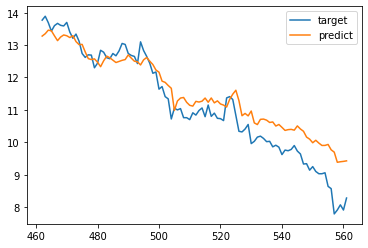

In [20]:
import matplotlib.pyplot as plt

y_test_test.plot()
plt.show()

## Evaluation

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_test,onedcnn_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_test,onedcnn_preds))
print("r2_score is : ", r2_score(y_test,onedcnn_preds))

mean_squared_error is :  0.3823727266928066
mean_absolute_error is :  0.49529024734497057
r2_score is :  0.8527291291987515


## Rolling Window

### Rolling with window 3

In [22]:
train_rolling_3 = train_save.rolling(window=3).mean()
train_rolling_3.dropna(inplace=True)
train_rolling_3.reset_index(inplace=True)
train_rolling_3.drop("index", axis=1,inplace=True)
train_rolling_3

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,2.020010e+07,7.423333,7.696667,7.366667,7.523333,7.433333,0.090000,1.228067,478180.990000,359357.734333,7.583333
1,2.020011e+07,7.500000,7.746667,7.453333,7.583333,7.523333,0.060000,0.796333,466231.563333,353043.045000,7.753333
2,2.020011e+07,7.543333,7.903333,7.466667,7.753333,7.583333,0.170000,2.226333,650622.806667,502094.879667,7.923333
3,2.020011e+07,7.810000,8.073333,7.630000,7.923333,7.753333,0.170000,2.220733,690683.790000,543374.497667,8.150000
4,2.020011e+07,7.983333,8.326667,7.760000,8.150000,7.923333,0.226667,2.890267,784671.053333,627820.648333,8.260000
...,...,...,...,...,...,...,...,...,...,...,...
555,2.022042e+07,8.906667,8.980000,8.663333,8.756667,8.910000,-0.153333,-1.704600,169935.233333,149035.003333,8.333333
556,2.022042e+07,8.720000,8.750000,8.263333,8.333333,8.756667,-0.423333,-4.849167,225111.660000,189746.032667,8.090000
557,2.022042e+07,8.333333,8.480000,8.013333,8.090000,8.333333,-0.243333,-2.790433,279793.673333,228588.178667,7.923333
558,2.022043e+07,8.053333,8.270000,7.763333,7.923333,8.090000,-0.166667,-1.846100,313513.683333,251400.996333,7.963333


In [23]:
train_rolling_3 = setup_cv(train_rolling_3)

In [24]:
lgbm_models = train_1dcnn(train_rolling_3, 5)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 15ms/step - loss: 1.5783 - val_loss: 0.4954
Epoch 1510/2000
4/4 [==============================] - 0s 15ms/step - loss: 1.4854 - val_loss: 0.5196
Epoch 1511/2000
4/4 [==============================] - 0s 15ms/step - loss: 1.8459 - val_loss: 0.4524
Epoch 1512/2000
4/4 [==============================] - 0s 18ms/step - loss: 1.5129 - val_loss: 0.4045
Epoch 1513/2000
4/4 [==============================] - 0s 15ms/step - loss: 1.2849 - val_loss: 0.3629
Epoch 1514/2000
4/4 [==============================] - 0s 15ms/step - loss: 1.5458 - val_loss: 0.4213
Epoch 1515/2000
4/4 [==============================] - 0s 16ms/step - loss: 1.6802 - val_loss: 0.7126
Epoch 1516/2000
4/4 [==============================] - 0s 15ms/step - loss: 1.3238 - val_loss: 1.2357
Epoch 1517/2000
4/4 [==============================] - 0s 15ms/step - loss: 1.7328 - val_loss: 1.6437
Epoch 1518/2000
4/4 [==========================

In [25]:
X_train_eva = train_rolling_3.loc[:, train_rolling_3.columns != 'target']
X_train_eva = X_train_eva.loc[:, X_train_eva.columns != 'fold']
y_train_eva = train_rolling_3[["target"]]

In [26]:
lgbm_preds = list()
for model in lgbm_models:
    lgbm_preds.append(model.predict(X_train_eva))
lgbm_preds = np.mean(lgbm_preds, axis=0)

In [27]:
y_test_test = y_train_eva.copy()
y_test_test['predict'] = lgbm_preds
y_test_test

,target,predict
0,7.583333,8.216361
1,7.753333,8.228698
2,7.923333,8.343607
3,8.150000,8.432316
4,8.260000,8.577555
...,...,...
555,8.333333,8.793210
556,8.090000,8.477672
557,7.923333,8.412781
558,7.963333,8.351954


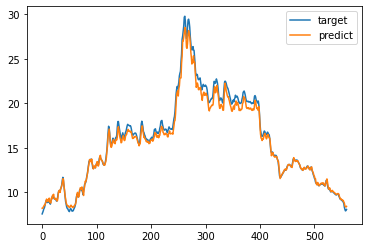

In [28]:
import matplotlib.pyplot as plt
y_test_test.plot()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_train_eva,lgbm_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_train_eva,lgbm_preds))
print("r2_score is : ", r2_score(y_train_eva,lgbm_preds))

mean_squared_error is :  0.3098354906965495
mean_absolute_error is :  0.4160424932525272
r2_score is :  0.9876176864641855


### Rolling with window 7

In [30]:
train_rolling_7 = train_save.rolling(window=7).mean()
train_rolling_7.dropna(inplace=True)
train_rolling_7.reset_index(inplace=True)
train_rolling_7.drop("index", axis=1,inplace=True)
train_rolling_7

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,2.020011e+07,7.682857,7.972857,7.555714,7.812857,7.660000,0.152857,1.992057,602688.021429,469810.615714,7.938571
1,2.020011e+07,7.821429,8.084286,7.674286,7.938571,7.812857,0.125714,1.614186,609013.628571,480493.754143,8.114286
2,2.020011e+07,7.934286,8.257143,7.792857,8.114286,7.938571,0.175714,2.203543,680377.651429,549150.332143,8.357143
3,2.020011e+07,8.114286,8.475714,7.970000,8.357143,8.114286,0.242857,2.964686,738702.804286,613652.001000,8.560000
4,2.020011e+07,8.371429,8.727143,8.162857,8.560000,8.357143,0.202857,2.490529,797383.602857,676453.608000,8.697143
...,...,...,...,...,...,...,...,...,...,...,...
551,2.022042e+07,9.035714,9.108571,8.874286,8.954286,9.035714,-0.081429,-0.900157,139272.970000,124558.126000,8.745714
552,2.022042e+07,8.928571,8.982857,8.672857,8.745714,8.954286,-0.208571,-2.372300,161140.784286,139971.905286,8.575714
553,2.022042e+07,8.740000,8.834286,8.500000,8.575714,8.745714,-0.170000,-1.920586,196311.087143,166298.796571,8.438571
554,2.022042e+07,8.555714,8.692857,8.320000,8.438571,8.575714,-0.137143,-1.521729,221572.457143,184600.667429,8.278571


In [31]:
train_rolling_7 = setup_cv(train_rolling_7)

In [32]:
lgbm_models = train_1dcnn(train_rolling_7, 5)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 15ms/step - loss: 1.6264 - val_loss: 0.0521
Epoch 1510/2000
4/4 [==============================] - 0s 15ms/step - loss: 1.8847 - val_loss: 0.2562
Epoch 1511/2000
4/4 [==============================] - 0s 16ms/step - loss: 1.7084 - val_loss: 0.2234
Epoch 1512/2000
4/4 [==============================] - 0s 17ms/step - loss: 1.4105 - val_loss: 0.0540
Epoch 1513/2000
4/4 [==============================] - 0s 15ms/step - loss: 2.0175 - val_loss: 0.0273
Epoch 1514/2000
4/4 [==============================] - 0s 15ms/step - loss: 1.9456 - val_loss: 0.0912
Epoch 1515/2000
4/4 [==============================] - 0s 15ms/step - loss: 1.7429 - val_loss: 0.1850
Epoch 1516/2000
4/4 [==============================] - 0s 16ms/step - loss: 1.7103 - val_loss: 0.1334
Epoch 1517/2000
4/4 [==============================] - 0s 15ms/step - loss: 1.8012 - val_loss: 0.1084
Epoch 1518/2000
4/4 [==========================

In [33]:
X_train_eva = train_rolling_7.loc[:, train_rolling_7.columns != 'target']
X_train_eva = X_train_eva.loc[:, X_train_eva.columns != 'fold']
y_train_eva = train_rolling_7[["target"]]

In [34]:
lgbm_preds = list()
for model in lgbm_models:
    lgbm_preds.append(model.predict(X_train_eva))
lgbm_preds = np.mean(lgbm_preds, axis=0)

In [35]:
y_test_test = y_train_eva.copy()
y_test_test['predict'] = lgbm_preds
y_test_test

,target,predict
0,7.938571,8.303816
1,8.114286,8.348494
2,8.357143,8.471311
3,8.560000,8.652031
4,8.697143,8.765676
...,...,...
551,8.745714,8.968165
552,8.575714,8.717541
553,8.438571,8.637752
554,8.278571,8.568307


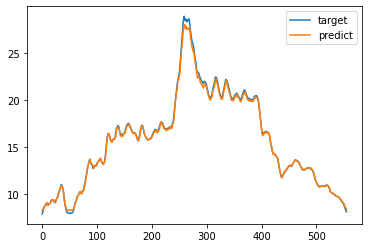

In [36]:
import matplotlib.pyplot as plt
y_test_test.plot()
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_train_eva,lgbm_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_train_eva,lgbm_preds))
print("r2_score is : ", r2_score(y_train_eva,lgbm_preds))

mean_squared_error is :  0.054447225957455575
mean_absolute_error is :  0.15566438765099455
r2_score is :  0.99778192949247


### Rolling with window 30

In [47]:
train_rolling_30 = train_save.rolling(window=30).mean()
train_rolling_30.dropna(inplace=True)
train_rolling_30.reset_index(inplace=True)
train_rolling_30.drop("index", axis=1,inplace=True)
train_rolling_30

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,2.020016e+07,8.711000,9.037667,8.518000,8.791000,8.733667,0.057333,0.785820,9.026582e+05,801100.055367,8.847667
1,2.020016e+07,8.766667,9.092333,8.571667,8.847667,8.791000,0.056667,0.760037,9.157653e+05,815484.153267,8.915667
2,2.020017e+07,8.830667,9.155000,8.632333,8.915667,8.847667,0.068000,0.880067,9.448911e+05,845644.831067,9.015000
3,2.020017e+07,8.896000,9.248333,8.696333,9.015000,8.915667,0.099333,1.205590,1.004631e+06,911954.342700,9.094333
4,2.020017e+07,8.997333,9.359667,8.776333,9.094333,9.015000,0.079333,1.000663,1.064208e+06,978774.173767,9.158000
...,...,...,...,...,...,...,...,...,...,...,...
528,2.022036e+07,9.733000,9.840000,9.553000,9.669000,9.728000,-0.059000,-0.609437,1.891018e+05,185227.558167,9.584667
529,2.022037e+07,9.662000,9.767667,9.468333,9.584667,9.669000,-0.084333,-0.906373,1.917968e+05,185770.866933,9.501333
530,2.022037e+07,9.584333,9.695000,9.398000,9.501333,9.584667,-0.083333,-0.884097,1.967318e+05,188155.818233,9.418667
531,2.022038e+07,9.498000,9.600000,9.307667,9.418667,9.501333,-0.082667,-0.861500,1.935763e+05,182147.356533,9.350333


In [48]:
train_rolling_30 = setup_cv(train_rolling_30)

In [49]:
lgbm_models = train_1dcnn(train_rolling_30, 5)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 15ms/step - loss: 1.7485 - val_loss: 0.0714
Epoch 1510/2000
4/4 [==============================] - 0s 15ms/step - loss: 1.5380 - val_loss: 0.0348
Epoch 1511/2000
4/4 [==============================] - 0s 15ms/step - loss: 1.8318 - val_loss: 0.0748
Epoch 1512/2000
4/4 [==============================] - 0s 15ms/step - loss: 2.2171 - val_loss: 0.0527
Epoch 1513/2000
4/4 [==============================] - 0s 14ms/step - loss: 1.4875 - val_loss: 0.0282
Epoch 1514/2000
4/4 [==============================] - 0s 23ms/step - loss: 1.5171 - val_loss: 0.0779
Epoch 1515/2000
4/4 [==============================] - 0s 17ms/step - loss: 1.7095 - val_loss: 0.1236
Epoch 1516/2000
4/4 [==============================] - 0s 14ms/step - loss: 1.6899 - val_loss: 0.1684
Epoch 1517/2000
4/4 [==============================] - 0s 14ms/step - loss: 1.4921 - val_loss: 0.1390
Epoch 1518/2000
4/4 [==========================

In [50]:
X_train_eva = train_rolling_30.loc[:, train_rolling_30.columns != 'target']
X_train_eva = X_train_eva.loc[:, X_train_eva.columns != 'fold']
y_train_eva = train_rolling_30[["target"]]

In [51]:
lgbm_preds = list()
for model in lgbm_models:
    lgbm_preds.append(model.predict(X_train_eva))
lgbm_preds = np.mean(lgbm_preds, axis=0)

In [52]:
y_test_test = y_train_eva.copy()
y_test_test['predict'] = lgbm_preds
y_test_test

,target,predict
0,8.847667,9.194733
1,8.915667,9.212732
2,9.015000,9.258395
3,9.094333,9.354533
4,9.158000,9.369946
...,...,...
528,9.584667,9.736794
529,9.501333,9.672755
530,9.418667,9.630228
531,9.350333,9.584842


In [53]:
y_test_test.to_csv("LGBM_Predict_Best_to_Andi.csv")

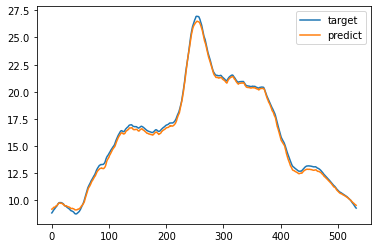

In [54]:
import matplotlib.pyplot as plt
y_test_test.plot()
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_train_eva,lgbm_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_train_eva,lgbm_preds))
print("r2_score is : ", r2_score(y_train_eva,lgbm_preds))

mean_squared_error is :  0.05068123867163498
mean_absolute_error is :  0.20437508126569587
r2_score is :  0.9977153323273258
